In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [ ]:
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
model= keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1))) #첫 매개변수: 필터의 개수
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 100s 66ms/step - loss: 0.5265 - accuracy: 0.8139 - val_loss: 0.3282 - val_accuracy: 0.8794
Epoch 2/20
   1/1500 [..............................] - ETA: 1:20 - loss: 0.3164 - accuracy: 0.8750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 77s 51ms/step - loss: 0.3470 - accuracy: 0.8755 - val_loss: 0.2905 - val_accuracy: 0.8924
Epoch 3/20
1500/1500 [==============================] - 98s 65ms/step - loss: 0.2982 - accuracy: 0.8930 - val_loss: 0.2736 - val_accuracy: 0.9019
Epoch 4/20
1500/1500 [==============================] - 84s 56ms/step - loss: 0.2639 - accuracy: 0.9042 - val_loss: 0.2465 - val_accuracy: 0.9074
Epoch 5/20
1500/1500 [==============================] - 71s 47ms/step - loss: 0.2406 - accuracy: 0.9121 - val_loss: 0.2252 - val_accuracy: 0.9172
Epoch 6/20
1500/1500 [==============================] - 68s 46ms/step - loss: 0.2205 - accuracy: 0.9193 - val_loss: 0.2230 - val_accuracy: 0.9190
Epoch 7/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2038 - accuracy: 0.9246 - val_loss: 0.2281 - val_accuracy: 0.9166
Epoch 8/20
1500/1500 [==============================] - 67s 45ms/step - loss: 0.1898 - accuracy: 0.9298 - val_loss: 0.2376 - val_accura

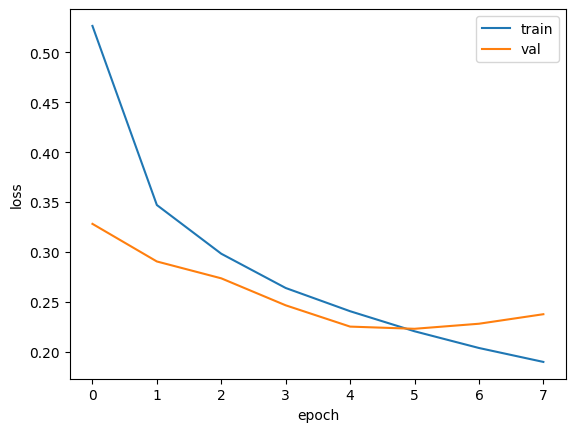

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

1/1 [==============================] - 0s 110ms/step
[[2.2977868e-13 2.9977858e-22 2.9643265e-17 2.3537322e-16 3.1109799e-14
  1.0790689e-13 5.6003677e-14 2.8348452e-17 1.0000000e+00 1.2202342e-16]]


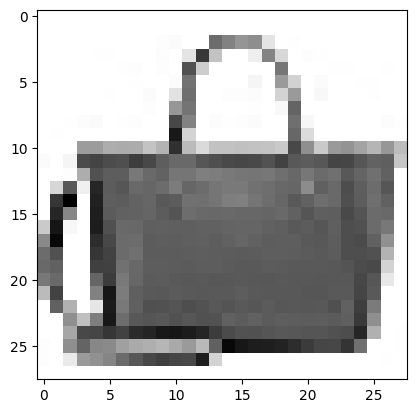

In [ ]:
model.evaluate(val_scaled, val_target)
preds = model.predict(val_scaled[0:1])
print(preds)
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

Text(0, 0.5, 'prob')

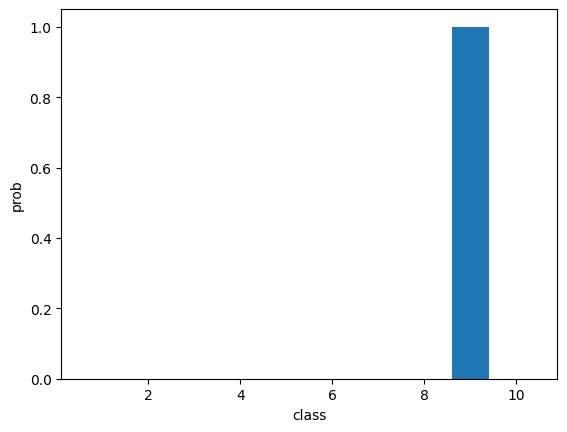

In [ ]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')

(3, 3, 1, 32) (32,)
-0.023187513 0.25020388


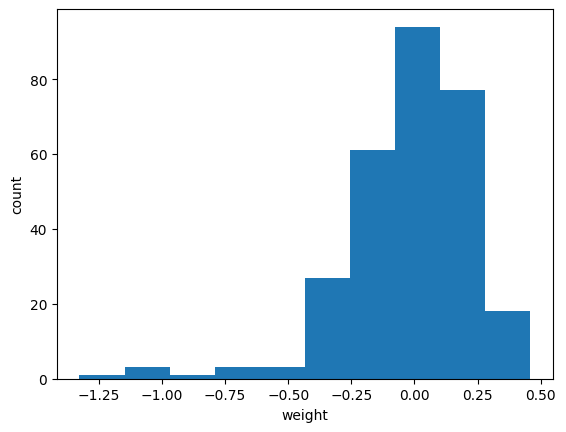

In [ ]:
model = keras.models.load_model('best-cnn-model.h5')
model.layers
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

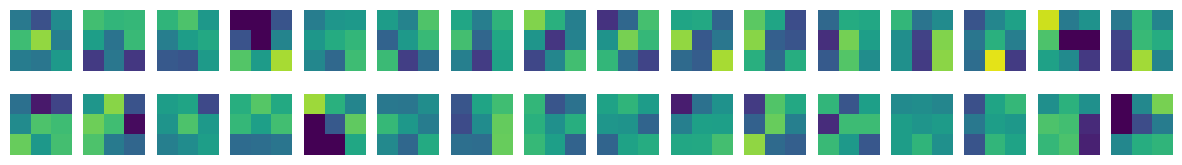

In [ ]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()